<a href="https://colab.research.google.com/github/tejaswinirb1/SamsungAIML/blob/main/braintumorfinal1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Name: Tejaswini R. Badiger
#USN: 2KE22CS167
#Branch: Computer Science and Engineering
#College name: K.L.E. Institute of Technology,Opp.Airport,Gokul,Hubballi-580027.India
#Project Title: Brain Tumor Detection
#Samsung Innovation Campus AIML 2024 Project

The main objective of this project is to create a machine learning model that can accurately classify brain tumors based on MRI scan images.
The specific goals include,


*   Use a trained deep learning model (e.g., Convolutional Neural Networks) to classify MRI images into different tumor categories such as glioma, meningioma, pituitary, or no tumor.
*   To assist medical professionals in diagnosing brain tumors.


*   To develop a user friendly web interface using Streamlit where users can upload MRI images, visualize the images, and receive predictions on the type of tumor present.
*   Thus, making it easier for the users to understand and interpret the result provided by the model.





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install kaggle                #Importing kaggle library to colab python

! mkdir ~/.kaggle                   #Make a kaggle directory in Colab

! cp kaggle.json ~/.kaggle/         #Copy the uploaded kaggle.json to this kaggle directory in colab

! chmod 600 ~/.kaggle/kaggle.json   #Provide rights for your colab to communicate with kaggle

#Downloading the dataset from kaggle

In [ ]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 98% 145M/149M [00:01<00:00, 89.3MB/s]
100% 149M/149M [00:01<00:00, 96.1MB/s]


#Unzip the dataset

In [ ]:
! unzip brain-tumor-mri-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

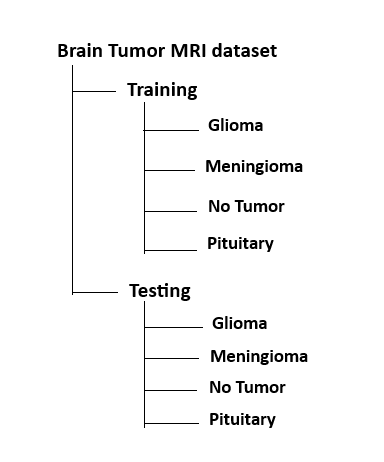

#Data Preprocessing

In [ ]:
import os   #Manage file directories
import cv2  #Work with images
import numpy as np #Handle the arrays
import matplotlib.pyplot as plt  #Plot visualizations
from tensorflow.keras.utils import to_categorical  #Prepare data for deep learning by encoding labels

In [ ]:
# Set the paths to training and testing dataset directories
train_data_dir ="/content/Training"
test_data_dir = "/content/Testing"

# Image categories
categories = ['pituitary', 'notumor', 'meningioma', 'glioma']

# Set image size for resizing
IMG_HEIGHT, IMG_WIDTH = 128, 128

# Function to load and preprocess images
def load_images(data_dir, categories, img_height, img_width):
    images = []
    labels = []

    for category in categories:
        category_path = os.path.join(data_dir, category)  # For each category, it constructs the full path to that category's folder.
        print(f"Checking directory: {category_path}")
        if not os.path.isdir(category_path):
            print(f"Error: {category_path} is not a directory")
            continue

        label = categories.index(category)  # Assign numeric label to each category

        for img_name in os.listdir(category_path):             #For each category, it lists all image filenames, constructs the full path to each image, and prints out the current image being processed.
            img_path = os.path.join(category_path, img_name)
            print(f"Processing image: {img_path}")
            try:
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is None:
                    print(f"Error loading image: {img_path}")
                    continue
                img = cv2.resize(img, (img_height, img_width))  # Resize image
                images.append(img)
                labels.append(label)
            except Exception as e:
                print(f"Error processing image {img_name}: {e}")

    # Convert lists to numpy arrays and normalize pixel values
    images = np.array(images) / 255.0  # Normalize to range [0, 1]
    images = images.reshape(-1, img_height, img_width, 1)  # Add channel dimension for grayscale

    labels = np.array(labels)
    return images, labels

# Load and preprocess training images
train_images, train_labels = load_images(train_data_dir, categories, IMG_HEIGHT, IMG_WIDTH)

# Load and preprocess testing images
test_images, test_labels = load_images(test_data_dir, categories, IMG_HEIGHT, IMG_WIDTH)

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, num_classes=len(categories))
test_labels = to_categorical(test_labels, num_classes=len(categories))

print(f"Training data shape: {train_images.shape}, Labels shape: {train_labels.shape}")
print(f"Testing data shape: {test_images.shape}, Labels shape: {test_labels.shape}")

Streaming output truncated to the last 5000 lines.
Processing image: /content/Training/notumor/Tr-no_0463.jpg
Processing image: /content/Training/notumor/Tr-no_0196.jpg
Processing image: /content/Training/notumor/Tr-no_0167.jpg
Processing image: /content/Training/notumor/Tr-no_0078.jpg
Processing image: /content/Training/notumor/Tr-no_0624.jpg
Processing image: /content/Training/notumor/Tr-no_0922.jpg
Processing image: /content/Training/notumor/Tr-no_0067.jpg
Processing image: /content/Training/notumor/Tr-no_1204.jpg
Processing image: /content/Training/notumor/Tr-no_0685.jpg
Processing image: /content/Training/notumor/Tr-no_1390.jpg
Processing image: /content/Training/notumor/Tr-no_0858.jpg
Processing image: /content/Training/notumor/Tr-no_0940.jpg
Processing image: /content/Training/notumor/Tr-no_1414.jpg
Processing image: /content/Training/notumor/Tr-no_0933.jpg
Processing image: /content/Training/notumor/Tr-no_1109.jpg
Processing image: /content/Training/notumor/Tr-no_1529.jpg
Proce

#Build the model


*   tensorflow: The library used for creating and training deep learning models.

*  Sequential: A linear stack of layers, meaning each layer has one input and one output.


*   Conv2D: A 2D convolution layer used for extracting features from images.
*   MaxPooling2D: A pooling layer used to down-sample the image and reduce the dimensionality.


*   Flatten: Flattens the output from the convolutional layers into a 1D array for feeding into the dense layers.
*  Dense: A fully connected layer where each neuron is connected to all the neurons in the previous layer.

*   Dropout: A regularization technique to reduce overfitting by randomly "dropping out" neurons during training.














In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
def create_cnn_model(img_height, img_width, num_classes):
    model = Sequential()

    # First convolutional layer
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second convolutional layer
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Third convolutional layer
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output for the dense layers
    model.add(Flatten())

    # Dense layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Add dropout to avoid overfitting

    # Output layer for classification
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

#Create the model

In [ ]:
# Create the model
num_classes = len(categories)
model = create_cnn_model(IMG_HEIGHT, IMG_WIDTH, num_classes)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,580 (12.61 MB)

 Trainable params: 3,304,580 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

#Train the model

In [ ]:
# Train the model
history = model.fit(train_images, train_labels,
                    epochs=10,
                    validation_data=(test_images, test_labels),
                    batch_size=32)

Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 241s 1s/step - accuracy: 0.6048 - loss: 0.9302 - val_accuracy: 0.7628 - val_loss: 0.5707
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 230s 1s/step - accuracy: 0.8468 - loss: 0.4352 - val_accuracy: 0.7986 - val_loss: 0.4732
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 256s 1s/step - accuracy: 0.8726 - loss: 0.3442 - val_accuracy: 0.8818 - val_loss: 0.2960
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.9111 - loss: 0.2360 - val_accuracy: 0.9123 - val_loss: 0.2180
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 260s 1s/step - accuracy: 0.9322 - loss: 0.1738 - val_accuracy: 0.9161 - val_loss: 0.2222
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.9477 - loss: 0.1524 - val_accuracy: 0.9466 - val_loss: 0.1489
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 268s 1s/step - accuracy: 0.9651 - loss: 0.1016 - val_accuracy: 0.9489 - val_loss: 0.1454
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 283s 1s/step - accuracy: 0.9682 - loss: 0.0838 - val_accu

#Evaluate the model

In [ ]:
# Evaluate the model on the testing set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

41/41 ━━━━━━━━━━━━━━━━━━━━ 13s 306ms/step - accuracy: 0.9868 - loss: 0.0500
Test accuracy: 0.966437816619873


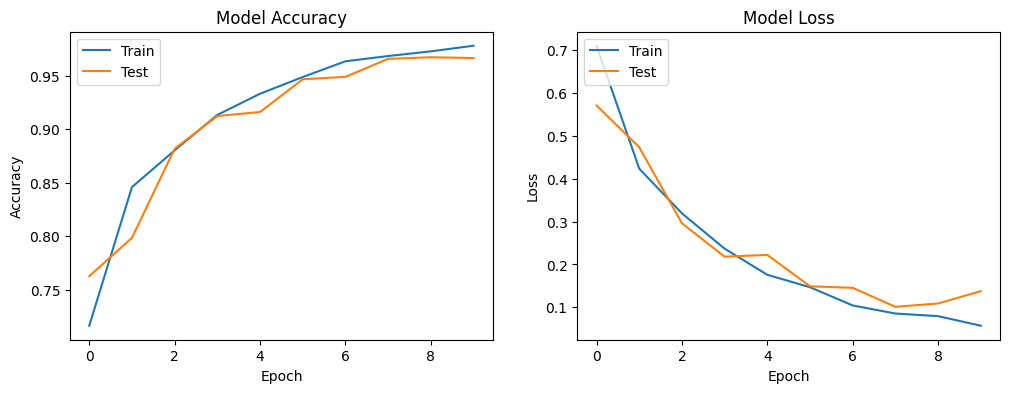

In [ ]:
# Plot training & validation accuracy/loss values
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

#Save the model

In [ ]:
# Save the trained model
model.save('/content/drive/MyDrive/project/model.keras')

In [ ]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('/content/drive/MyDrive/project/model.keras')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on test data
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)

# Generate classification report
print(classification_report(y_true, y_pred_classes, target_names=categories))

# Confusion Matrix
print(confusion_matrix(y_true, y_pred_classes))

41/41 ━━━━━━━━━━━━━━━━━━━━ 13s 308ms/step
              precision    recall  f1-score   support

   pituitary       0.98      0.99      0.99       300
     notumor       0.98      1.00      0.99       405
  meningioma       0.92      0.94      0.93       306
      glioma       0.97      0.92      0.95       300

    accuracy                           0.97      1311
   macro avg       0.97      0.96      0.96      1311
weighted avg       0.97      0.97      0.97      1311

[[298   0   1   1]
 [  0 405   0   0]
 [  5   7 287   7]
 [  0   0  23 277]]


#Streamlit

In [ ]:
! pip install -q streamlit

In [ ]:
%%writefile app.py

import streamlit as st
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load model
try:
    model = load_model('/content/drive/MyDrive/project/model.keras')
except Exception as e:
    st.error(f"Error loading model: {e}")

st.title("Brain Tumor Detection")

uploaded_file = st.file_uploader("Choose an MRI image...", type="jpg")

if uploaded_file is not None:
    try:
        # Read the image
        file_bytes = np.asarray(bytearray(uploaded_file.read()), dtype=np.uint8)
        img = cv2.imdecode(file_bytes, 1)
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_resized = cv2.resize(img_gray, (128, 128))
        img_reshaped = np.reshape(img_resized, (1, 128, 128, 1)) / 255.0

        # Plot the image using Matplotlib
        st.write("### Uploaded Image:")
        fig, ax = plt.subplots()
        ax.imshow(img_gray, cmap='gray')
        ax.axis('off')  # Turn off axis labels
        st.pyplot(fig)

        categories = ['pituitary', 'notumor', 'meningioma', 'glioma']

        # Predict
        prediction = model.predict(img_reshaped)
        predicted_class = np.argmax(prediction)
        st.write(f"Predicted class: {categories[predicted_class]}")

    except Exception as e:
        st.error(f"Error processing the image: {e}")


Overwriting app.py


In [ ]:
! npm install localtunnel


up to date, audited 23 packages in 2s

3 packages are looking for funding
  run `npm fund` for details

2 moderate severity vulnerabilities

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.


In [ ]:
! streamlit run app.py &>/content/logs.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

34.80.69.155
your url is: https://cool-ghosts-win.loca.lt
